In [2]:
#load required packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.svm import SVC
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics, neighbors, model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns


%matplotlib inline
#xls = pd.ExcelFile('')
df1 = pd.read_excel('PS5 - Credit Card Risk Data - Nov 2019 .xlsx', 'Std_training')
df1.rename(columns= {'Outcomes: Default = 1':'Outcomes'}, inplace = True)
df1

,Unique Applicant ID,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Outcomes,Eggertopia Scores
0,1,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,0,215.227394
1,2,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,1,4387.395317
2,3,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,1,3653.976974
3,4,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,0,3005.809349
4,5,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,0,176.383592
...,...,...,...,...,...,...,...,...,...
195,196,0.917975,0.684569,-0.318363,0.213191,-0.504262,-0.671432,0,665.975665
196,197,-1.227163,-0.117292,1.861881,-0.647416,0.570020,0.661930,0,860.723089
197,198,-1.182574,-0.922105,-0.755907,-0.443476,0.451202,0.572421,0,1380.840050
198,199,0.523605,1.192563,-0.144719,1.395060,-0.000993,-2.602703,0,457.662212


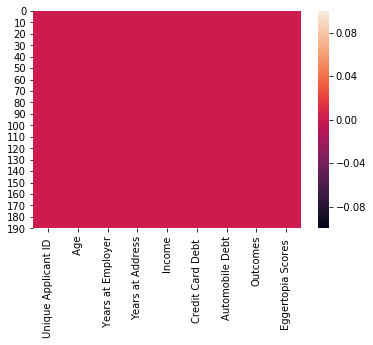

In [3]:
#checking for null values in the data
sns.heatmap(df1.isnull())

In [4]:
#make numpy arrays 
X_train = np.array(df1[[' Age', ' Years at Employer', 'Years at Address', 'Income', 'Credit Card Debt ', 'Automobile Debt']])
y_train = np.array(df1['Outcomes'])

In [5]:
#create test and training sets
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
sk_logistic = linear_model.LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [7]:
sk_logistic.predict(X_train)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [8]:
pos_prob_train = sk_logistic.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, pos_prob_train, drop_intermediate=False)

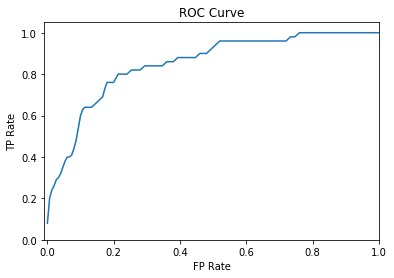

In [9]:
roc = sns.lineplot(x=fpr, y=tpr, ci=False)
roc.set(xlabel='FP Rate', ylabel='TP Rate', title='ROC Curve', xlim=(-0.01,1),ylim=(0,1.05))
plt.show()

In [10]:
#Get the AUC score for training data
auc_train = metrics.roc_auc_score(y_train, pos_prob_train)
#print results
print("Training AUC: ", round(auc_train, 3))

Training AUC:  0.85


In [11]:
sk_logistic.coef_

array([[-0.2002308 , -1.49191799,  0.23512215, -0.69304227, -1.34885885,
        -0.45832751]])

In [12]:
sk_logistic.intercept_

array([-1.52928413])

In [13]:
sk_logistic.coef_ = np.array([[-0.7999909 , -2.99999999,  0.90212815, -1.08408227, -2.09999985,
        -1.99999959]])

In [14]:
poss_prob_train = sk_logistic.predict_proba(X_train)[:,1]
#Get the AUC score for training data
auc_train = metrics.roc_auc_score(y_train, poss_prob_train)
#print results
print("Training AUC: ", round(auc_train, 3))

Training AUC:  0.834


In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, poss_prob_train, drop_intermediate=False)

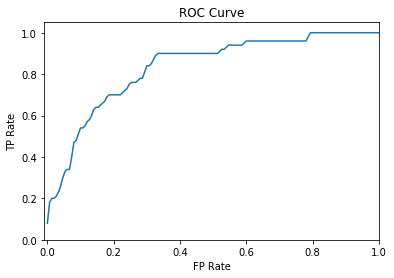

In [16]:
roc = sns.lineplot(x=fpr, y=tpr, ci=False)
roc.set(xlabel='FP Rate', ylabel='TP Rate', title='ROC Curve', xlim=(-0.01,1),ylim=(0,1.05))
plt.show()

In [17]:
df1['Hybrid1'] = df1['Income']+df1['Credit Card Debt ']
df1['Hybrid2'] = df1['Automobile Debt']+df1[' Years at Employer']
df1['Hybrid3'] = df1[' Age']/df1['Years at Address']
df1

,Unique Applicant ID,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Outcomes,Eggertopia Scores,Hybrid1,Hybrid2,Hybrid3
0,1,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,0,215.227394,-0.232836,0.326061,0.334675
1,2,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,1,4387.395317,-2.822907,-1.010287,-0.009406
2,3,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,1,3653.976974,-1.844355,0.362648,-0.329464
3,4,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,0,3005.809349,-0.089353,-0.535852,-0.426696
4,5,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,0,176.383592,0.040578,0.634121,0.283755
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.917975,0.684569,-0.318363,0.213191,-0.504262,-0.671432,0,665.975665,-0.291071,0.013137,-2.883417
196,197,-1.227163,-0.117292,1.861881,-0.647416,0.570020,0.661930,0,860.723089,-0.077396,0.544638,-0.659099
197,198,-1.182574,-0.922105,-0.755907,-0.443476,0.451202,0.572421,0,1380.840050,0.007726,-0.349685,1.564444
198,199,0.523605,1.192563,-0.144719,1.395060,-0.000993,-2.602703,0,457.662212,1.394067,-1.410139,-3.618090


In [18]:
#make numpy arrays 
X1_train = df1.drop(['Outcomes','Unique Applicant ID '], axis=1).values
y1_train = df1['Outcomes'].values
hybridmodel = linear_model.LogisticRegression(solver='liblinear').fit(X1_train, y1_train)

In [19]:
y1_train

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [20]:
hybridmodel.predict(X1_train)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
prob_train = hybridmodel.predict_proba(X1_train)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y1_train, prob_train, drop_intermediate=False)

In [22]:
#Get the AUC score for training data
auc1_train = metrics.roc_auc_score(y1_train, prob_train)
#print results
print("Training AUC: ", round(auc1_train, 3))

Training AUC:  0.861


In [23]:
hybridmodel.coef_

array([[-3.88395011e-02, -4.96698920e-01,  2.33404738e-01,
        -7.45153428e-02, -3.46973686e-01,  1.10743794e-01,
         6.23928291e-04, -4.21489029e-01, -3.85955127e-01,
        -1.27300021e-05]])

In [24]:
#knn classifier on training data
#empty list for auc scores
scores = []
for i in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    prob = knn.predict_proba(X_train)[:,1]
    auc = metrics.roc_auc_score(y_train, prob)
    scores.append(auc)

In [25]:
scores

[1.0,
 0.9338666666666666,
 0.9032,
 0.8840666666666667,
 0.8908,
 0.8762666666666666,
 0.8719333333333333,
 0.8690666666666667,
 0.8602]

In [26]:
#knn classifier with k = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
#predict class on training data
knn_prob_train = knn.predict_proba(X_train)[:,1]

In [27]:
#auc score on training data for knn classifier with k=5
metrics.roc_auc_score(y_train, knn_prob_train)

0.8908

In [28]:
#get training predictions with different threshold
knn_train_pred = (knn.predict(X_train))
#make confusion matrix on training data
knn_cf = metrics.confusion_matrix(y_train, knn_train_pred)

In [29]:
#confusion matrix
knn_cf

array([[143,   7],
       [ 28,  22]])

In [30]:
print("True Positives: ", knn_cf[1,1])
print("False Positives: ", knn_cf[0,1])
print("True Negatives: ", knn_cf[0,0])
print("False Negatives: ", knn_cf[1,0])

True Positives:  22
False Positives:  7
True Negatives:  143
False Negatives:  28


In [31]:
thres = [x/100 for x in range(0,100)]
cost = 0

best_thres = 0.0
best_cost = 99999999999999

for i, t in enumerate(thres):
    knn_train_pred_dt = (knn.predict_proba(X_train)[:,1] >= t).astype(bool)
    knn_cf_dt = metrics.confusion_matrix(y_train, knn_train_pred_dt)
    cost = (3500*knn_cf_dt[0,1]) + (4000*knn_cf_dt[1,0])
    if cost < best_cost:
        best_cost = cost
        best_thres = t

print("Optimum threshold:", best_thres)
print("Minimum cost:", best_cost)

Optimum threshold: 0.21
Minimum cost: 133000


In [32]:
knn_cf_dt

array([[150,   0],
       [ 46,   4]])

In [33]:
print("True Positives: ", knn_cf_dt[1,1])
print("False Positives: ", knn_cf_dt[0,1])
print("True Negatives: ", knn_cf_dt[0,0])
print("False Negatives: ", knn_cf_dt[1,0])

True Positives:  4
False Positives:  0
True Negatives:  150
False Negatives:  46


In [34]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [35]:
knn.predict_proba(X_train)[:,1]

array([0.2, 0.4, 0.4, 0. , 0. , 0.4, 0. , 0.2, 0.4, 0. , 0.4, 0.2, 0.2,
       0.2, 0. , 0. , 0. , 0.6, 0.4, 0.4, 0.4, 0.2, 0.2, 0. , 0.4, 0. ,
       0. , 0. , 0.2, 0. , 0.4, 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0.2, 1. ,
       0. , 0. , 0. , 0.4, 0.2, 0. , 0. , 0.6, 0.4, 0. , 0.4, 0.4, 0.2,
       1. , 0.2, 0.2, 0. , 0. , 0.6, 0.2, 0. , 0.2, 0.2, 0.8, 0.6, 0. ,
       0.4, 0.2, 0.2, 0.2, 0.6, 0.2, 0.4, 0.2, 0.2, 0. , 0. , 0.4, 0.2,
       0.2, 0.2, 0. , 0.6, 0.4, 0.4, 0. , 0. , 0.4, 0.2, 0.2, 0.4, 0. ,
       0.2, 0.2, 0.4, 0.6, 0. , 0.2, 0. , 0. , 0. , 0.2, 0.2, 0. , 0.2,
       0.2, 0.6, 0.2, 0.8, 0.4, 0. , 0.4, 0.4, 0. , 0.4, 0. , 0.8, 0.4,
       0.2, 0. , 0. , 0.4, 0. , 0.4, 0. , 0.2, 0.8, 0.4, 0.2, 0.2, 1. ,
       0.4, 0.4, 0.2, 0. , 0. , 1. , 0.6, 0.4, 0. , 0.8, 0.4, 0. , 0.2,
       0. , 0.6, 0.2, 0.4, 0.8, 0.4, 0.4, 0.2, 0.2, 0. , 0.2, 0. , 0.8,
       0. , 0.2, 0.6, 0. , 0. , 0.4, 0. , 0. , 0.2, 0. , 0.4, 0.2, 0.4,
       0. , 0. , 0.8, 0.2, 0. , 0.2, 0.4, 0. , 0.2, 0.6, 0.6, 0.

In [36]:
df1 # interpret #2 data point.

,Unique Applicant ID,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Outcomes,Eggertopia Scores,Hybrid1,Hybrid2,Hybrid3
0,1,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,0,215.227394,-0.232836,0.326061,0.334675
1,2,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,1,4387.395317,-2.822907,-1.010287,-0.009406
2,3,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,1,3653.976974,-1.844355,0.362648,-0.329464
3,4,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,0,3005.809349,-0.089353,-0.535852,-0.426696
4,5,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,0,176.383592,0.040578,0.634121,0.283755
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.917975,0.684569,-0.318363,0.213191,-0.504262,-0.671432,0,665.975665,-0.291071,0.013137,-2.883417
196,197,-1.227163,-0.117292,1.861881,-0.647416,0.570020,0.661930,0,860.723089,-0.077396,0.544638,-0.659099
197,198,-1.182574,-0.922105,-0.755907,-0.443476,0.451202,0.572421,0,1380.840050,0.007726,-0.349685,1.564444
198,199,0.523605,1.192563,-0.144719,1.395060,-0.000993,-2.602703,0,457.662212,1.394067,-1.410139,-3.618090


In [37]:
df1Test = pd.read_excel('PS5 - Credit Card Risk Data - Nov 2019 .xlsx', 'TestData')
df1Test

,Unique Applicant ID,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Outcomes: Default = 1,Eggertopia Scores
0,201,-1.087907,-1.231476,-0.976306,-0.938605,0.216962,0.347977,1,3032.901421
1,202,-0.861508,-0.638356,-0.765494,-0.221249,-0.953226,0.440784,1,2825.800440
2,203,0.292076,0.058467,-1.340763,-0.437207,0.018201,0.624745,0,322.315761
3,204,-0.837194,-0.067750,0.397341,-0.845875,0.697892,0.613221,0,249.832438
4,205,0.523237,-0.504215,-0.138256,-0.518949,0.522238,0.255239,0,1066.581297
...,...,...,...,...,...,...,...,...,...
195,396,1.782889,1.026228,-0.981405,0.649469,-0.031341,-1.007914,0,224.978249
196,397,-1.347022,-0.853204,-0.208245,-0.798783,0.677807,0.868008,0,1088.642189
197,398,-0.251758,-0.709232,-0.122664,-0.469844,0.601749,0.318960,0,886.553102
198,399,1.085565,0.730934,-1.236432,-0.079897,0.648910,0.506898,0,92.170206


In [38]:
df1Test.columns = ['ID', 'AgeT', 'YearsET', 'YearsAT', 'IncomeT', 'CDebt', 'ADebt', 'OutcomesT','Egg']
df1Test

,ID,AgeT,YearsET,YearsAT,IncomeT,CDebt,ADebt,OutcomesT,Egg
0,201,-1.087907,-1.231476,-0.976306,-0.938605,0.216962,0.347977,1,3032.901421
1,202,-0.861508,-0.638356,-0.765494,-0.221249,-0.953226,0.440784,1,2825.800440
2,203,0.292076,0.058467,-1.340763,-0.437207,0.018201,0.624745,0,322.315761
3,204,-0.837194,-0.067750,0.397341,-0.845875,0.697892,0.613221,0,249.832438
4,205,0.523237,-0.504215,-0.138256,-0.518949,0.522238,0.255239,0,1066.581297
...,...,...,...,...,...,...,...,...,...
195,396,1.782889,1.026228,-0.981405,0.649469,-0.031341,-1.007914,0,224.978249
196,397,-1.347022,-0.853204,-0.208245,-0.798783,0.677807,0.868008,0,1088.642189
197,398,-0.251758,-0.709232,-0.122664,-0.469844,0.601749,0.318960,0,886.553102
198,399,1.085565,0.730934,-1.236432,-0.079897,0.648910,0.506898,0,92.170206


In [39]:
df1Test.columns

Index(['ID', 'AgeT', 'YearsET', 'YearsAT', 'IncomeT', 'CDebt', 'ADebt',
       'OutcomesT', 'Egg'],
      dtype='object')

In [40]:
df1Test['Hybrid1'] = df1Test['IncomeT']+df1Test['CDebt']
df1Test['Hybrid2'] = df1Test['ADebt']+df1Test['YearsET']
df1Test['Hybrid3'] = df1Test['AgeT']/df1Test['YearsAT']

In [41]:
#numpy arrays on test data
X_testS = np.array(df1Test[['AgeT', 'YearsET', 'YearsAT', 'IncomeT', 'CDebt', 'ADebt']])
Y_testS = np.array(df1Test['OutcomesT'])

In [42]:
#predict class on test data
knn_prob_test = knn.predict_proba(X_testS)[:,1]

In [43]:
#auc score on training data for knn classifier with k=5
metrics.roc_auc_score(Y_testS, knn_prob_test)

0.7543333333333333

In [44]:
#get training predictions with different threshold
knn_test_pred = (knn.predict_proba(X_testS)[:,1] >= 0.4).astype(bool)
#make confusion matrix on training data
knn_cf_test = metrics.confusion_matrix(Y_testS, knn_test_pred)

In [45]:
knn_cf_test

array([[114,  36],
       [ 18,  32]])

In [46]:
cost_test = 3500*knn_cf_test[0,1] + 4000*knn_cf_test[1,0]
print(cost_test)
print(cost_test/Y_testS.shape[0])

198000
990.0


In [47]:
df1

,Unique Applicant ID,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Outcomes,Eggertopia Scores,Hybrid1,Hybrid2,Hybrid3
0,1,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,0,215.227394,-0.232836,0.326061,0.334675
1,2,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,1,4387.395317,-2.822907,-1.010287,-0.009406
2,3,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,1,3653.976974,-1.844355,0.362648,-0.329464
3,4,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,0,3005.809349,-0.089353,-0.535852,-0.426696
4,5,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,0,176.383592,0.040578,0.634121,0.283755
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.917975,0.684569,-0.318363,0.213191,-0.504262,-0.671432,0,665.975665,-0.291071,0.013137,-2.883417
196,197,-1.227163,-0.117292,1.861881,-0.647416,0.570020,0.661930,0,860.723089,-0.077396,0.544638,-0.659099
197,198,-1.182574,-0.922105,-0.755907,-0.443476,0.451202,0.572421,0,1380.840050,0.007726,-0.349685,1.564444
198,199,0.523605,1.192563,-0.144719,1.395060,-0.000993,-2.602703,0,457.662212,1.394067,-1.410139,-3.618090


In [48]:
df1.columns

Index(['Unique Applicant ID ', ' Age', ' Years at Employer',
       'Years at Address', 'Income', 'Credit Card Debt ', 'Automobile Debt',
       'Outcomes', 'Eggertopia Scores ', 'Hybrid1', 'Hybrid2', 'Hybrid3'],
      dtype='object')

In [49]:
XE_train = df1.drop(['Outcomes','Unique Applicant ID '], axis=1).values
yE_train = df1['Outcomes'].values

In [50]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5).fit(XE_train, yE_train)

In [51]:
#get training predictions with different threshold
knn_train_pred_dt = [1 if pred >= 0.4 else 0 for pred in knn.predict_proba(XE_train)[:,1]]
#make confusion matrix on training data
knn_cf_dt = metrics.confusion_matrix(yE_train, knn_train_pred_dt)

In [52]:
knn_cf_dt

array([[121,  29],
       [  7,  43]])

In [53]:
print("True Positives: ", knn_cf_dt[1,1])
print("False Positives: ", knn_cf_dt[0,1])
print("True Negatives: ", knn_cf_dt[0,0])
print("False Negatives: ", knn_cf_dt[1,0])

True Positives:  43
False Positives:  29
True Negatives:  121
False Negatives:  7


In [54]:
cost = 3500*knn_cf_dt[0,1] + 4000*knn_cf_dt[1,0]
cost
print(cost/XE_train.shape[0])

647.5


In [55]:
df1Test

,ID,AgeT,YearsET,YearsAT,IncomeT,CDebt,ADebt,OutcomesT,Egg,Hybrid1,Hybrid2,Hybrid3
0,201,-1.087907,-1.231476,-0.976306,-0.938605,0.216962,0.347977,1,3032.901421,-0.721644,-0.883500,1.114309
1,202,-0.861508,-0.638356,-0.765494,-0.221249,-0.953226,0.440784,1,2825.800440,-1.174475,-0.197572,1.125427
2,203,0.292076,0.058467,-1.340763,-0.437207,0.018201,0.624745,0,322.315761,-0.419007,0.683212,-0.217843
3,204,-0.837194,-0.067750,0.397341,-0.845875,0.697892,0.613221,0,249.832438,-0.147983,0.545471,-2.106991
4,205,0.523237,-0.504215,-0.138256,-0.518949,0.522238,0.255239,0,1066.581297,0.003289,-0.248976,-3.784548
...,...,...,...,...,...,...,...,...,...,...,...,...
195,396,1.782889,1.026228,-0.981405,0.649469,-0.031341,-1.007914,0,224.978249,0.618128,0.018313,-1.816670
196,397,-1.347022,-0.853204,-0.208245,-0.798783,0.677807,0.868008,0,1088.642189,-0.120976,0.014805,6.468437
197,398,-0.251758,-0.709232,-0.122664,-0.469844,0.601749,0.318960,0,886.553102,0.131906,-0.390271,2.052417
198,399,1.085565,0.730934,-1.236432,-0.079897,0.648910,0.506898,0,92.170206,0.569013,1.237832,-0.877981


In [56]:
XE_test = df1Test.drop(['OutcomesT','ID'], axis=1).values
yE_test = df1Test['OutcomesT'].values

In [57]:
XE_test.shape

(200, 10)

In [58]:
knn.predict_proba(XE_test)[:,1]

array([0.6, 0.8, 0. , 0. , 0.2, 0. , 0. , 0.2, 0.2, 0. , 0. , 0.4, 0. ,
       0.4, 0.4, 0.2, 0. , 0.2, 0.4, 0.8, 0. , 0.4, 0.2, 0. , 0.8, 0. ,
       0. , 0. , 1. , 0.4, 0. , 0.4, 0.2, 0.2, 0. , 0.4, 1. , 0.4, 0.4,
       0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0.6, 0.4, 0.4, 0.8,
       0.4, 0. , 0.6, 0. , 0. , 0.2, 0.2, 0. , 0.4, 0.6, 0.8, 0. , 0.8,
       0. , 0.4, 0. , 0. , 0.2, 0.6, 0. , 0.6, 0. , 0.4, 0.2, 0. , 0.4,
       0.6, 0.4, 0. , 0. , 0. , 0. , 0.2, 0. , 0.4, 0.2, 0.4, 0.4, 0.8,
       0.4, 0. , 0.8, 0. , 0.4, 0. , 0. , 0.2, 0.4, 0.4, 0. , 0.4, 0.4,
       0. , 0.2, 0. , 0.2, 0. , 0. , 0.8, 0. , 0.6, 0. , 0.4, 0. , 0.4,
       0. , 0. , 0.4, 0. , 0.6, 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. ,
       0. , 0. , 0.4, 0.8, 0. , 0.8, 0.4, 0. , 0.6, 0. , 0.6, 0.6, 0.2,
       0. , 1. , 0.6, 0.2, 0.2, 0.6, 0.6, 0. , 0. , 0.4, 0. , 0.2, 0. ,
       0. , 1. , 1. , 0. , 0. , 0.4, 0.4, 0. , 0. , 0.4, 0. , 0. , 0.4,
       0.8, 0. , 0.2, 0.8, 0. , 0.2, 0.2, 0. , 0.6, 0. , 1. , 0.

In [59]:
#get test predictions with different threshold
knn_test_pred_dt = [1 if pred >= 0.4 else 0 for pred in knn.predict_proba(XE_test)[:,1]]
#make confusion matrix on training data
knn_cf_dt = metrics.confusion_matrix(yE_test, knn_test_pred_dt)

In [60]:
knn_cf_dt

array([[105,  45],
       [ 14,  36]])

In [61]:
print("True Positives: ", knn_cf_dt[1,1])
print("False Positives: ", knn_cf_dt[0,1])
print("True Negatives: ", knn_cf_dt[0,0])
print("False Negatives: ", knn_cf_dt[1,0])

True Positives:  36
False Positives:  45
True Negatives:  105
False Negatives:  14


In [62]:
cost = 3500*knn_cf_dt[0,1] + 4000*knn_cf_dt[1,0]
print(cost)
print(cost/yE_test.shape[0])

213500
1067.5


# 2

## 2.1

In [63]:
df3 = pd.read_excel('PS5 - Credit Card Risk Data - Nov 2019 .xlsx', 'A2')
df3

,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Outcomes,Profit and Loss
0,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,0,3206.433814
1,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,1,2940.318213
2,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,1,-1023.975604
3,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,0,2944.657871
4,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,0,738.412843
...,...,...,...,...,...,...,...,...
195,0.917975,0.684569,-0.318363,0.213191,-0.504262,-0.671432,0,4653.443168
196,-1.227163,-0.117292,1.861881,-0.647416,0.570020,0.661930,0,-566.152505
197,-1.182574,-0.922105,-0.755907,-0.443476,0.451202,0.572421,0,2387.263503
198,0.523605,1.192563,-0.144719,1.395060,-0.000993,-2.602703,0,9315.851606


In [64]:
df3t = pd.read_excel('PS5 - Credit Card Risk Data - Nov 2019 .xlsx', 'A3')
df3t

,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Profit and Loss
0,-1.087907,-1.231476,-0.976306,-0.938605,0.216962,0.347977,-9529.695740
1,-0.861508,-0.638356,-0.765494,-0.221249,-0.953226,0.440784,-2590.063991
2,0.292076,0.058467,-1.340763,-0.437207,0.018201,0.624745,2720.840722
3,-0.837194,-0.067750,0.397341,-0.845875,0.697892,0.613221,1014.830924
4,0.523237,-0.504215,-0.138256,-0.518949,0.522238,0.255239,2526.055048
...,...,...,...,...,...,...,...
195,1.782889,1.026228,-0.981405,0.649469,-0.031341,-1.007914,6130.183996
196,-1.347022,-0.853204,-0.208245,-0.798783,0.677807,0.868008,1049.813009
197,-0.251758,-0.709232,-0.122664,-0.469844,0.601749,0.318960,2826.399284
198,1.085565,0.730934,-1.236432,-0.079897,0.648910,0.506898,1899.646205


In [67]:
X3_train = df3.drop(["Profit and Loss"], axis=1).values
y3_train = df3['Profit and Loss'].values
X3_test = df3t.drop(["Profit and Loss"], axis=1).values
y3_test = df3t["Profit and Loss"].values

In [68]:
model = LinearRegression()                         # instantiate model
model.fit(X3_train, y3_train)                        # fit model
y3_pred = model.predict(X3_train)                     # predict using model
model.score(X3_train, y3_train)                        # r^2

0.9715630823183197

In [69]:
from math import sqrt
rms_train = sqrt(metrics.mean_squared_error(y3_train, y3_pred))
rms_train

970.6331919111357

In [62]:
# import 
dfp = pd.read_excel('PS5 - Credit Card Risk Data - Nov 2019 .xlsx', 'PNLT')
dfpt = pd.read_excel('PS5 - Credit Card Risk Data - Nov 2019 .xlsx', 'PNLTE')

In [206]:
dfp.head()

,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Eggertopia Scores,Profit and Loss,Hybrid1,Hybrid2,Hybrid3
0,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,215.227394,3206.433814,-0.232836,0.326061,0.334675
1,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,4387.395317,2940.318213,-2.822907,-1.010287,-0.009406
2,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,3653.976974,-1023.975604,-1.844355,0.362648,-0.329464
3,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,3005.809349,2944.657871,-0.089353,-0.535852,-0.426696
4,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,176.383592,738.412843,0.040578,0.634121,0.283755


In [64]:
dfp = dfp.drop("Standardized", axis=1)
dfpt = dfpt.drop("Standardized", axis=1)

In [207]:
dfp.columns

Index([' Age', ' Years at Employer', 'Years at Address', 'Income',
       'Credit Card Debt ', 'Automobile Debt', 'Eggertopia Scores ',
       'Profit and Loss', 'Hybrid1', 'Hybrid2', 'Hybrid3'],
      dtype='object')

In [66]:
dfpt.columns

Index([' Age', ' Years at Employer', 'Years at Address', 'Income',
       'Credit Card Debt ', 'Automobile Debt', 'Eggertopia Scores ',
       'Profit and Loss'],
      dtype='object')

In [67]:
X2_train = dfp.drop(["Profit and Loss", "Eggertopia Scores "], axis=1).values
y2_train = dfp['Profit and Loss'].values
X2_test = dfpt.drop(["Profit and Loss", "Eggertopia Scores "], axis=1).values
y2_test = dfpt['Profit and Loss'].values

In [209]:
model = LinearRegression()                         # instantiate model
model.fit(X_train, y_train)                        # fit model
y_pred = model.predict(X_train)                     # predict using model
model.score(X_train, y_train)                        # r^2

0.26009539449329333

In [210]:
from math import sqrt
rms_train = sqrt(metrics.mean_squared_error(y_train, y_pred))
rms_train

0.3724676006480396

## 2.2

In [204]:
dfp['Hybrid1'] = dfp['Income']+dfp['Credit Card Debt ']
dfp['Hybrid2'] = dfp['Automobile Debt']+dfp[' Years at Employer']
dfp['Hybrid3'] = dfp[' Age']/dfp['Years at Address']

In [208]:
dfp

,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt,Eggertopia Scores,Profit and Loss,Hybrid1,Hybrid2,Hybrid3
0,-0.260650,0.114167,-0.778815,-0.221391,-0.011446,0.211894,215.227394,3206.433814,-0.232836,0.326061,0.334675
1,-0.010718,0.495792,1.139494,0.361981,-3.184888,-1.506080,4387.395317,2940.318213,-2.822907,-1.010287,-0.009406
2,0.369496,0.567691,-1.121509,0.262468,-2.106823,-0.205043,3653.976974,-1023.975604,-1.844355,0.362648,-0.329464
3,-0.729186,-1.067134,1.708913,-0.595191,0.505837,0.531282,3005.809349,2944.657871,-0.089353,-0.535852,-0.426696
4,-0.250083,-0.166253,-0.881336,-0.490361,0.530939,0.800374,176.383592,738.412843,0.040578,0.634121,0.283755
...,...,...,...,...,...,...,...,...,...,...,...
195,0.917975,0.684569,-0.318363,0.213191,-0.504262,-0.671432,665.975665,4653.443168,-0.291071,0.013137,-2.883417
196,-1.227163,-0.117292,1.861881,-0.647416,0.570020,0.661930,860.723089,-566.152505,-0.077396,0.544638,-0.659099
197,-1.182574,-0.922105,-0.755907,-0.443476,0.451202,0.572421,1380.840050,2387.263503,0.007726,-0.349685,1.564444
198,0.523605,1.192563,-0.144719,1.395060,-0.000993,-2.602703,457.662212,9315.851606,1.394067,-1.410139,-3.618090


In [205]:
dfpt['Hybrid1'] = dfpt['Income']+dfpt['Credit Card Debt ']
dfpt['Hybrid2'] = dfpt['Automobile Debt']+dfpt[' Years at Employer']
dfpt['Hybrid3'] = dfpt[' Age']/dfpt['Years at Address']

In [72]:
X_train = dfp.drop(["Profit and Loss", "Eggertopia Scores "], axis=1).values
y_train = dfp['Profit and Loss'].values
X_test = dfpt.drop(["Profit and Loss", "Eggertopia Scores "], axis=1).values
y_test = dfpt['Profit and Loss'].values

In [73]:
model = LinearRegression()                         # instantiate model
model.fit(X_train, y_train)                        # fit model
y_pred = model.predict(X_train)                     # predict using model
model.score(X_train, y_train)                        # r^2

0.655338418791888

In [74]:
from math import sqrt
rms_train = sqrt(metrics.mean_squared_error(y_train, y_pred))
rms_train

3379.172141070109

In [75]:
model.coef_

array([   48.67758076,   726.95641745,  -379.96608375,  2562.03166738,
       -1440.67989753,  -374.00200305,  1121.35176985,   352.95441441,
          -4.85883012])

## 2.3

In [76]:
# train
knn = neighbors.KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [77]:
# predict
#R square
r_squared = knn.score(X_train,y_train)
r_squared

0.5723243368286475

In [78]:
knn_train_pred_dt = knn.predict(X_train)
rms_train = sqrt(metrics.mean_squared_error(y_train, knn_train_pred_dt))
rms_train

3764.186621098453

### 2.3 Part 2

In [79]:
# choose threshold
threshold = y_pred.mean()
#threshold = 0




In [80]:
threshold

1905.512640954781

In [81]:
# filter Profit and Loss using on threshold
print("Total profit: {:.2f}".format(sum(dfp['Profit and Loss'][dfp['Profit and Loss'] > threshold])))
print("Average profit: {:.2f}".format(sum(dfp['Profit and Loss'][dfp['Profit and Loss'] > threshold])/y_train.shape[0]))

Total profit: 583644.71
Average profit: 2918.22


## 2.4

In [82]:
y_pred = model.predict(X_test)                     # predict using model
model.score(X_test, y_test)                        # r^2

0.41646072243773596

In [83]:
rms_train = sqrt(metrics.mean_squared_error(y_test, y_pred))
rms_train

3886.40511973568

In [84]:
print("Total profit: {:.2f}".format(sum(dfpt['Profit and Loss'][dfpt['Profit and Loss'] > threshold])))
print("Average profit: {:.2f}".format(sum(dfpt['Profit and Loss'][dfpt['Profit and Loss'] > threshold])/y_test.shape[0]))

Total profit: 498987.24
Average profit: 2494.94


## 2.5

In [85]:
X_train = dfp.drop(["Profit and Loss"], axis=1).values
y_train = dfp['Profit and Loss'].values
X_test = dfpt.drop(["Profit and Loss"], axis=1).values
y_test = dfpt['Profit and Loss'].values

In [86]:
model = LinearRegression()                         # instantiate model
model.fit(X_train, y_train)                        # fit model
y_pred = model.predict(X_train)                     # predict using model
model.score(X_train, y_train)                        # r^2

0.6858078989397289

In [87]:
dfp.columns

Index([' Age', ' Years at Employer', 'Years at Address', 'Income',
       'Credit Card Debt ', 'Automobile Debt', 'Eggertopia Scores ',
       'Profit and Loss', 'Hybrid1', 'Hybrid2', 'Hybrid3'],
      dtype='object')

In [88]:
model.coef_

array([-2.16116793e+02,  4.18696250e+01, -3.48794623e+02,  2.67573081e+03,
       -2.14401343e+03, -2.87803798e+02, -1.55939681e+00,  5.31717378e+02,
       -2.45934173e+02,  3.72601417e+00])

In [89]:
from math import sqrt
rms_train = sqrt(metrics.mean_squared_error(y_train, y_pred))
rms_train

3226.3502276210597

In [90]:
threshold = y_pred.mean()

In [91]:
print("Total profit: {:.2f}".format(sum(dfp['Profit and Loss'][dfp['Profit and Loss'] > threshold])))
print("Average profit: {:.2f}".format(sum(dfp['Profit and Loss'][dfp['Profit and Loss'] > threshold])/y_train.shape[0]))

Total profit: 583644.71
Average profit: 2918.22


In [92]:
# Eggertopia worth

In [93]:
threshold

1905.5126409547818